<a href="https://colab.research.google.com/github/UoN-CS/lily_public/blob/main/comp3002_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP3002 Big Data and Cloud Project
## Task 1

This notebook describes the tasks that you must complete for the first task.  You should complete the work in this notebook and ensure that you regularly commit it to your GitHub classroom.  You can choose to include additional python .py files if you wish to create some helper functions to keep this notebook clean.  Make sure they are committed to the GitHub repository too.

### Scenario

You are provided with a small sample dataset of Amazon Review Data.  This notebook talks you through the process of loading that data into Spark SQL and asks you to analyse that data.  On the Block Release day on 18th November (Open Cohort) and 20th November (Ford Cohort) you will have access to a larger dataset hosted in the Cloud.  Much of the day will be spent moving your solutions to the cloud, and answering additional questions which will be set on the day.

If you do not finish everything during Block Release.  You will have additionl time to reflect on the experience and finalise your code before final submission on 26th November.

Amazon Review Data was downloaded from [here](https://jmcauley.ucsd.edu/data/amazon/) but a small sample is provided with this assignment.

### Learning Outcomes

Remember that the primary aim with this task is not to get the "correct" answer, but for you to use the time to become confident with some basic Big Data processing.

* **LO1** Understand the principles that allow the processing of big data sets.

* **LO3** Understand the limitations of big data technologies for distributed processing.

* **LO3** Demonstrate practical skills required to implement big-data solutions using modern large-scale data and compute infrastructures.

### Assessment

Assessment follows a similar approach to that used previously on the programme. This small task attracts up to a grade C. The second task to be released later this term will allow you to stretch to higher grades.

---

### Grading Criteria

#### **Grade C (50)**
In addition to the requirements for D-grade, the work should:
*   Demonstrate the ability to implement a solution to the challenge tasks posed during the block release day using the Spark Cluster.

If the solution is not complete, a C-grade may still be awarded if a strong narrative is provided to explain where further work is needed and what the next steps would be.

---

#### **Grade D (40)**
As this is the passing grade for the project, you must achieve all the learning outcomes.

The work should meet the following minimum criteria:
*   Work should be a Jupyter notebook submitted via Github Classrooms with accompanying helper .py files that are free from errors and execute successfully.
*   The notebook demonstrates that the apprentice can:
    1.  Connect to a spark context.
    2.  Transmit data to Spark.
    3.  Execute remote transformations and actions on Spark.
    4.  Retrieve outputs and present them in a suitable manner.
*   Provide acceptable answers to questions posed in the task template.

The work may be limited in that:
*   It may only run on a single machine via PySpark.
*   It may not demonstrate an attempt at the challenge tasks posed during the block release day.

---

#### **Grade E (30)**
Learning outcomes not met at threshold level, but with additional work a pass could be achieved. This may mean that code does not run, or solutions are that achieve the brief but without successfully using the Spark infrastructure.

---

#### **Grade F (0-29)**
Learning outcomes not met at threshold level, but with additional work a pass could be achieved. This may mean that code does not run, or solutions are that achieve the brief but without successfully using the Spark infrastructure.

---

In addition, for a grade of E and above, 10 discretionary marks are available for presentation quality of submission (including coding).

First you need to establish a Spark Session in a slighlty different way using Spark SQL:

In [ ]:
import pyspark.pandas as ps
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pyspark.sql.functions as sql


/usr/local/lib/python3.12/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [ ]:
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Task1") \
    .getOrCreate()

In [ ]:
df = spark.read.json("zdat3002-coursework-1-2025-lilyrobinsn/data/reviews.json")

display(df.limit(5).toPandas())

,asin,image,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote
0,B000K2PJ4K,None,5.0,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"( Blue/Orange, None, Big Boys, None)",Five Stars,1441324800,True,None
1,B000K2PJ4K,None,5.0,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"( Black (37467610) / Red/White, None, Big Boy...",Five Stars,1441324800,True,None
2,B000K2PJ4K,None,5.0,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"( Blue/Gray Logo, None, Big Boys, None)",Five Stars,1441324800,True,None
3,B000K2PJ4K,None,5.0,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"( Blue (37867638-99) / Yellow, None, Big Boys...",Five Stars,1441324800,True,None
4,B000K2PJ4K,None,5.0,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"( Blue/Pink, None, Big Boys, None)",Five Stars,1441324800,True,None


Having imported the data, take a look at the schema.  Perhaps try running some SQL queries over it.  I've suggested a first example, but you can come up with more questions.

**Can you plot how many ratings of each grade are present in the data?**

### Hints

You've loaded your data, and you want to try and process that data remotely as much as possible, only collecting results at the end.

You can add columns to the remote DataFrame using

df.withColumn("myColumnName", data)

You can execute SQL like operations such as group by and order by:

df.orderBy("columnName")
df.groupBy("columnName")

Think about how you would transform the data in the dataframe, and then collect just the data needed to make the plot.

DataFrame[overall: double, count: bigint]

,overall,count
0,1.0,117
1,2.0,93
2,3.0,337
3,4.0,471
4,5.0,2158


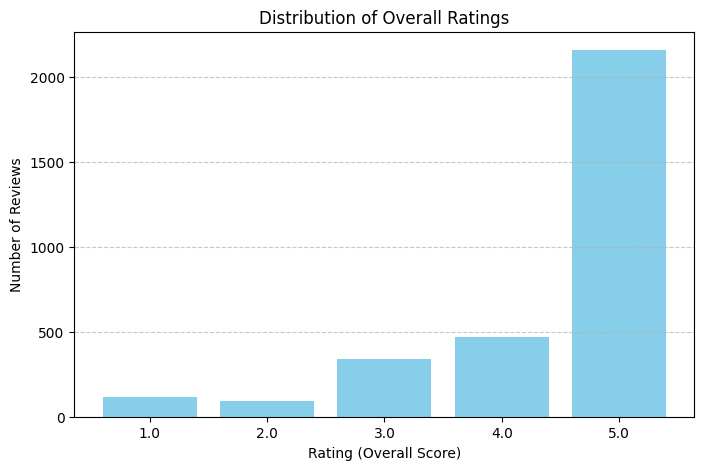

In [ ]:
# Group by 'overall' rating and count occurrences
# This creates a new Spark DataFrame with the rating and its count
rating_counts_spark = df.groupBy("overall").count().orderBy(sql.col("overall").asc())
display(rating_counts_spark)
# Convert the Spark DataFrame to a Pandas DataFrame for plotting
# This step collects the aggregated data to the driver node.
rating_counts_pd = rating_counts_spark.toPandas()
display(rating_counts_pd)

# Create the bar plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(rating_counts_pd['overall'].astype(str), rating_counts_pd['count'], color='skyblue')
plt.title("Distribution of Overall Ratings")
plt.xlabel("Rating (Overall Score)")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0) # Ensure x-axis labels are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid
plt.show()

**Can you create a histogram of the number of reviews received on each week of the year.  Are there any patterns present?**

,weekNumber,count
0,1,55
1,2,86
2,3,66
3,4,23
4,5,53
5,6,49
6,7,49
7,8,88
8,9,51
9,10,71


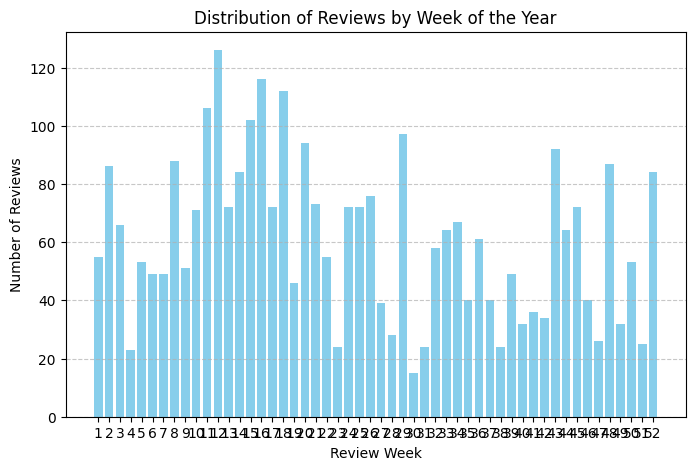

In [ ]:
# Group by 'overall' rating and count occurrences
# This creates a new Spark DataFrame with the rating and its count

df = df.withColumn("reviewDate", sql.to_date(sql.to_timestamp(sql.col("unixReviewTime"))))
df = df.withColumn("weekNumber", sql.weekofyear(sql.col("reviewDate")))

rating_perweek_spark = df.groupBy("weekNumber").count().orderBy(sql.col("weekNumber").asc())

# Convert the Spark DataFrame to a Pandas DataFrame for plotting
# This step collects the aggregated data to the driver node.
rating_perweek_spark = rating_perweek_spark.toPandas()
display(rating_perweek_spark)

# Create the bar plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(rating_perweek_spark['weekNumber'].astype(str), rating_perweek_spark['count'], color='skyblue')
plt.title("Distribution of Reviews by Week of the Year")
plt.xlabel("Review Week")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0) # Ensure x-axis labels are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid
plt.show()

**Can you think of your own query?**

In [ ]:
# Your code goes here

More tasks will be released at the block release day when you will have time to go deeper, and use much larger datasets on a cluster.

In [ ]:
# Your code goes here